## Loading Python Packages

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
%matplotlib inline
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV

## Data Sets Infomation
#### Check the types of features, number of missing values, the types of values

- Discrete features: PassengerId, Age, SibSp, Parch                           
- Continous feature: Fare
- Categorical feature: Embarked                                                          
- Ordinal feature: Pclass
- Mixture feature: Cabin, Ticket

In [109]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

combine = [train, test]
for df in combine:
    print (df.info())
    print ('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket      

In [110]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Getting Descriptive Statistics of Training Data

In [111]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Canavan, Miss. Mary",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


## Data Visualization
#### Female/Single people has higher survival rate

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

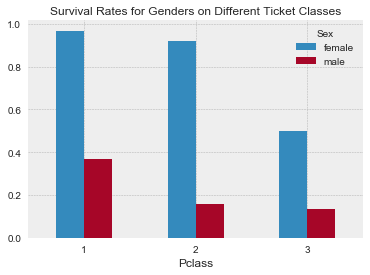

In [113]:
train.pivot_table(values='Survived', columns='Sex', index=['Pclass'], aggfunc='mean').plot(kind='bar')
plt.title('Survival Rates for Genders on Different Ticket Classes', size=12)
plt.xticks(rotation='0')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

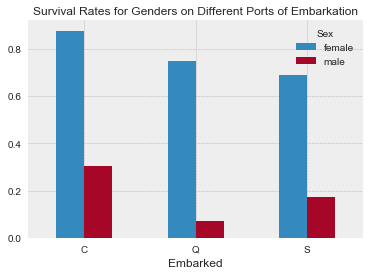

In [114]:
train.pivot_table(values='Survived', columns='Sex', index=['Embarked'], aggfunc='mean').plot(kind='bar')
plt.title('Survival Rates for Genders on Different Ports of Embarkation', size=12)
plt.xticks(rotation='0')

#### Familiy Size Checking

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

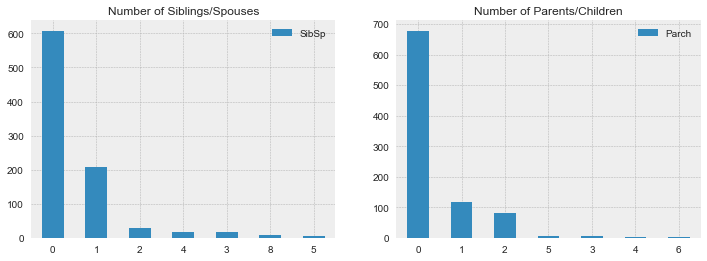

In [115]:
plt.figure(figsize=(12,4))
plt.subplot(121)
train['SibSp'].value_counts().plot(kind='bar').legend()
plt.title('Number of Siblings/Spouses', size=12)
plt.xticks(rotation='0')

plt.subplot(122)
train['Parch'].value_counts().plot(kind='bar').legend()
plt.title('Number of Parents/Children', size=12)
plt.xticks(rotation='0')

#### Young/Aged passengers have higher survival rates

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text xticklabel objects>)

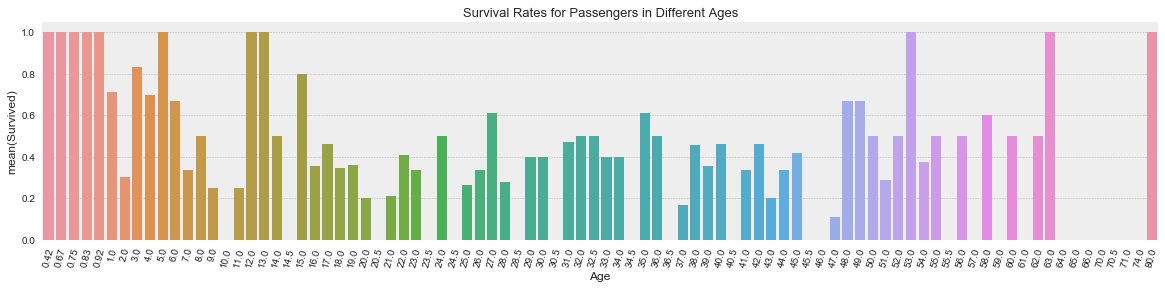

In [117]:
fig, axis1 = plt.subplots(1, 1, figsize=(20, 4))
age_survival_num = train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=age_survival_num)
plt.title('Survival Rates for Passengers in Different Ages', size=13)
plt.xticks(rotation=75)

## Features Engineering

#### Creating new feature 'Family Size' by adding 'sibsp' and 'Parch'

(array([0]), <a list of 1 Text xticklabel objects>)

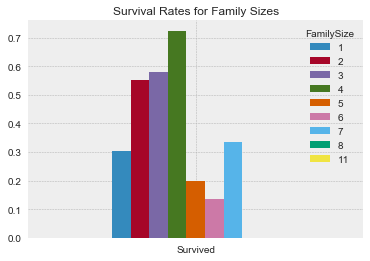

In [118]:
for df in combine:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
train.pivot_table(values='Survived', columns='FamilySize', aggfunc='mean').plot(kind='bar')
plt.title('Survival Rates for Family Sizes', size=12)
plt.xticks(rotation='0')

#### Creating new feature 'Alone' for single people

In [120]:
for df in combine:
    df['Alone'] = 0
    df.loc[df['FamilySize'] == 1, 'Alone'] = 1
    
train['Alone'].value_counts()

1    537
0    354
Name: Alone, dtype: int64

#### Filling missing values for 'Embarked'

In [121]:
for df in combine:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### 'Fare': Filling missing values, grouping values

In [122]:
for df in combine:
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    #df['Fare'] = scale(df['Fare'])
    df.loc[df['Fare'] <= 10.5, 'Fare'] = 0
    df.loc[(df['Fare'] > 10.5) & (df['Fare'] <= 21.679), 'Fare'] = 1
    df.loc[(df['Fare'] > 21.679) & (df['Fare'] <= 39.688), 'Fare'] = 2
    df.loc[(df['Fare'] > 39.688) & (df['Fare'] <= 512.329), 'Fare'] = 3
    df.loc[df['Fare'] > 512.329, 'Fare'] = 4 
    
train[['Fare', 'Survived']].groupby('Fare', as_index=False).mean()

,Fare,Survived
0,0.0,0.209366
1,1.0,0.426901
2,2.0,0.441989
3,3.0,0.635838
4,4.0,1.000000


####  'Age': Filling missing values, grouping values

In [123]:
for df in combine:
    avg = df['Age'].mean()
    std = df['Age'].std()
    NaN_count = df['Age'].isnull().sum()
    
    age_fill = np.random.randint(avg-std, avg+std, NaN_count)
    df.loc[df['Age'].isnull(), 'Age'] = age_fill
    df['Age'] = df['Age'].astype(int)
    
    df.loc[df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[df['Age'] > 64, 'Age'] = 4
    
train[['Age', 'Survived']].groupby('Age').mean()

,Survived
Age,
0,0.518182
1,0.355705
2,0.374016
3,0.434783
4,0.090909


#### 'Name': Extracting titles

In [124]:
import re

def only_title(name):
    title = re.findall(' ([A-Za-z]+)\.', name)
    if title:
        return title[0]

for df in combine:
    df['Title'] = df['Name'].apply(only_title)
    
train[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [125]:
for df in combine:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 
                                     'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### Data Encoding

In [98]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0.0,NaN,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,3.0,C85,C,2,0,Mrs


In [99]:
feature_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']

for df in combine:
    df.drop(feature_drop, axis=1, inplace=True)

train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,male,1,0.0,S,0,Mr
1,1,1,female,2,3.0,C,0,Mrs


In [100]:
def encode_features(train, test):
    features = ['Sex', 'Embarked', 'Age', 'Title']
    df_combined = pd.concat([train[features], test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        train[feature] = le.transform(train[feature])
        test[feature] = le.transform(test[feature])
    return train, test
    
train, test = encode_features(train, test)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,1,1,0.0,2,0,2
1,1,1,0,2,3.0,0,0,3
2,1,3,0,1,0.0,2,1,1
3,1,1,0,2,3.0,2,0,3
4,0,3,1,2,0.0,2,1,2


#### Feature heatmap

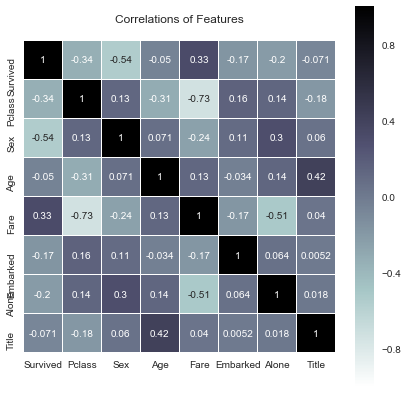

In [103]:
colormap = plt.cm.bone_r
plt.figure(figsize=(7, 7))
plt.title('Correlations of Features', y=1.04, size=12)
sns.heatmap(train.astype(float).corr(), square=True, cmap=colormap, annot=True, linewidth=0.2)

## Train Models

In [105]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

print('X', X.shape)
print('y', y.shape)
print('Null Accuracy for y_test dataset:', y.value_counts()[1]/len(y))

X (891, 7)
y (891,)
Null Accuracy for y_test dataset: 0.383838383838


#### Define model searching function to get the model with the best parameters and relative accuracy

In [66]:
def model_search(model, param_grid):
    grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
    grid_fit = grid.fit(X, y)
    best_model = grid_fit.best_estimator_
    test_score = grid_fit.best_score_
    return best_model, test_score

In [67]:
svc = SVC(gamma='auto', probability=True)
svc_params = {'C': np.logspace(-2, 3, 6)}

logreg = LogisticRegression()
logreg_params = {'C': np.logspace(-2, 3, 6)}

rf = RandomForestClassifier(max_features='auto')
rf_params = {'n_estimators': list(range(10, 110, 10)), 'criterion':['gini', 'entropy']}

knn = KNeighborsClassifier()
knn_params = {'n_neighbors':list(range(10, 110, 10)), 'weights':['distance', 'uniform']}

et = ExtraTreesClassifier(max_features='auto')
et_params = {'n_estimators': list(range(10, 110, 10)), 'criterion':['gini', 'entropy']}

gb = GradientBoostingClassifier(max_features='auto')
gb_params = {'n_estimators': list(range(10, 110, 10))}

In [133]:
print(model_search(svc, svc_params), '\n')
print(model_search(logreg, logreg_params), '\n')
print(model_search(rf, rf_params), '\n')
print(model_search(knn, knn_params), '\n')
print(model_search(et, et_params), '\n')
print(model_search(gb, gb_params))

(SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 0.81369248035914699) 

(LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 0.78563411896745228) 

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False), 0.81705948372615034) 

(KNeighborsClassifier(algorithm='auto', leaf_size=

# Voting Classifier

In [68]:
vclf = VotingClassifier(estimators=[('svc', svc), ('rf', rf), ('gb', gb)])
param_grid = {'voting':['hard', 'soft']}
grid = GridSearchCV(vclf, param_grid, cv=10, n_jobs=-1)
grid_fit = grid.fit(X, y)
grid_fit.best_score_

0.81930415263748602

# Output

In [69]:
vclf = grid_fit.best_estimator_
vclf.fit(X, y)
pred = vclf.predict(test)

test_id = pd.read_csv('test.csv')['PassengerId']
output = pd.DataFrame({'PassengerId' : test_id, 'Survived': pred})

output.to_csv('Predictions.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
